# MLP DNN 모델(다입력 다:1)
* 현재 작성된 모델은 예측 결과가 형편없는 상태이기 때문에 하이퍼 파라미터 튜닝을 통해서 더 좋은 모델로 변경해야 한다. 

## 1. 데이터

In [1]:
import numpy as np

* 3행 10열의 데이터 셋 준비 --> 10행 3열의 모양으로 변경 

In [2]:
dataset = np.array([[1,2,3,4,5,6,7,8,9,10],
                    [11,12,13,14,15,16,17,18,19,20],
                    [21,22,23,24,25,26,27,28,29,30]])
print("dataset.shape : ", dataset.shape)

dataset = np.transpose(dataset)
print("dataset.shape : ", dataset.shape)

dataset.shape :  (3, 10)
dataset.shape :  (10, 3)


#### 데이터 자르기 함수 

In [3]:
def split_xy3(dataset, time_steps, y_column):
    x, y = list(), list()
    
    for i in range(len(dataset)):
        
        x_end_number = i + time_steps
        y_end_number = x_end_number + y_column -1
        
        if y_end_number > len(dataset):
            break;
        
        tmp_x = dataset[i:x_end_number, :-1]               # 정해진 범위의 행과 마지막 전까지 데이터 추출 
        tmp_y = dataset[x_end_number-1:y_end_number, -1]   # 정해진 범위의 마지막 행의 마지막 데이터 추출 
    
        x.append(tmp_x)
        y.append(tmp_y)
        
    return np.array(x), np.array(y)

* x는 3개씩, y는 1개씩 잘라서 사용 
* 데이터 입력 (?, 3, 2)
* 출력 (8, )

In [4]:
x, y = split_xy3(dataset, 3, 1)
print(x, "\n", y)
print(x.shape)
print(y.shape)

[[[ 1 11]
  [ 2 12]
  [ 3 13]]

 [[ 2 12]
  [ 3 13]
  [ 4 14]]

 [[ 3 13]
  [ 4 14]
  [ 5 15]]

 [[ 4 14]
  [ 5 15]
  [ 6 16]]

 [[ 5 15]
  [ 6 16]
  [ 7 17]]

 [[ 6 16]
  [ 7 17]
  [ 8 18]]

 [[ 7 17]
  [ 8 18]
  [ 9 19]]

 [[ 8 18]
  [ 9 19]
  [10 20]]] 
 [[23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]]
(8, 3, 2)
(8, 1)


* DNN 모델은 2차원 형태를 요구함 
* x : (8, 3, 2) -> (8, 6) 
    - 데이터 reshape할 때 주의할 점은 전체 shape의 곱은 reshape한 후의 곱과 동일 해야 한다. 
    - 앞이 8이기 때문에 2차원으로 변경할 경우 동일하게 되기 위해서는 3 * 2 즉, 6을 사용해야 한다. 
* y : (8, 1)
    - 모델의 아웃풋에서 사용할 수 있도록 y값을 벡터 형태로 변경 (8, )
    - 출력값은 8개짜리 벡터의 1차원 모습 

In [5]:
x = x.reshape(x.shape[0], x.shape[1] * x.shape[2])
print(x.shape)
y = y.reshape(y.shape[0])
print(y.shape)

(8, 6)
(8,)


## 2. 모델 구성

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

* input_shape(3,2) : 3개의 컬럼을 1개씩 잘라서 쓰는 LSTM을 구성하겠다는 의미

In [7]:
model = Sequential()
# model.add(LSTM(64, input_shape=(3, 2)))    # RNN의 경우 사용 - LSTM 
model.add(Dense(64, input_shape=(6, )))      # DNN의 경우 사용 - Dense
model.add(Dense(1))   # y값이 1개이기 때문에 1로 설정 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


## 3. 훈련

In [8]:
model.compile(loss='mse', optimizer='adam', metrics=['mse'])
hist = model.fit(x, y, epochs=300, batch_size=1)

Train on 8 samples
Epoch 1/300
8/8 [==============================] - 0s 57ms/sample - loss: 656.6728 - mse: 656.6729
Epoch 2/300
8/8 [==============================] - 0s 1ms/sample - loss: 393.3387 - mse: 393.3387
Epoch 3/300
8/8 [==============================] - 0s 1ms/sample - loss: 191.8785 - mse: 191.8785
Epoch 4/300
8/8 [==============================] - 0s 1ms/sample - loss: 80.0121 - mse: 80.0121
Epoch 5/300
8/8 [==============================] - 0s 1ms/sample - loss: 27.1672 - mse: 27.1672
Epoch 6/300
8/8 [==============================] - 0s 2ms/sample - loss: 9.3138 - mse: 9.3138
Epoch 7/300
8/8 [==============================] - 0s 1ms/sample - loss: 10.7310 - mse: 10.7310
Epoch 8/300
8/8 [==============================] - 0s 1ms/sample - loss: 11.2762 - mse: 11.2762
Epoch 9/300
8/8 [==============================] - 0s 2ms/sample - loss: 11.0589 - mse: 11.0589
Epoch 10/300
8/8 [==============================] - 0s 2ms/sample - loss: 9.3078 - mse: 9.3078
Epoch 11/300
8/8 

8/8 [==============================] - 0s 2ms/sample - loss: 0.2591 - mse: 0.2591
Epoch 87/300
8/8 [==============================] - 0s 1ms/sample - loss: 0.2344 - mse: 0.2344
Epoch 88/300
8/8 [==============================] - 0s 2ms/sample - loss: 0.2162 - mse: 0.2162
Epoch 89/300
8/8 [==============================] - 0s 1ms/sample - loss: 0.2005 - mse: 0.2005  
Epoch 90/300
8/8 [==============================] - 0s 1ms/sample - loss: 0.1997 - mse: 0.1997
Epoch 91/300
8/8 [==============================] - 0s 1ms/sample - loss: 0.1954 - mse: 0.1954
Epoch 92/300
8/8 [==============================] - 0s 1ms/sample - loss: 0.1638 - mse: 0.1638
Epoch 93/300
8/8 [==============================] - 0s 1ms/sample - loss: 0.1612 - mse: 0.1612
Epoch 94/300
8/8 [==============================] - 0s 1ms/sample - loss: 0.1458 - mse: 0.1458
Epoch 95/300
8/8 [==============================] - 0s 1ms/sample - loss: 0.1344 - mse: 0.1344
Epoch 96/300
8/8 [==============================] - 0s 1ms/sa

8/8 [==============================] - 0s 1ms/sample - loss: 2.7532e-05 - mse: 2.7532e-05
Epoch 170/300
8/8 [==============================] - 0s 1ms/sample - loss: 2.1112e-05 - mse: 2.1112e-05
Epoch 171/300
8/8 [==============================] - 0s 1ms/sample - loss: 1.8082e-05 - mse: 1.8082e-05
Epoch 172/300
8/8 [==============================] - 0s 1ms/sample - loss: 1.6576e-05 - mse: 1.6576e-05
Epoch 173/300
8/8 [==============================] - 0s 1ms/sample - loss: 1.4909e-05 - mse: 1.4909e-05
Epoch 174/300
8/8 [==============================] - 0s 1ms/sample - loss: 1.1550e-05 - mse: 1.1550e-05
Epoch 175/300
8/8 [==============================] - 0s 1ms/sample - loss: 1.0208e-05 - mse: 1.0208e-05
Epoch 176/300
8/8 [==============================] - 0s 1ms/sample - loss: 8.8843e-06 - mse: 8.8843e-06
Epoch 177/300
8/8 [==============================] - 0s 1ms/sample - loss: 8.3721e-06 - mse: 8.3721e-06
Epoch 178/300
8/8 [==============================] - 0s 1ms/sample - loss: 6.2

8/8 [==============================] - 0s 1ms/sample - loss: 1.3824e-10 - mse: 1.3824e-10
Epoch 248/300
8/8 [==============================] - 0s 1ms/sample - loss: 1.3506e-10 - mse: 1.3506e-10
Epoch 249/300
8/8 [==============================] - 0s 1ms/sample - loss: 1.3506e-10 - mse: 1.3506e-10
Epoch 250/300
8/8 [==============================] - 0s 1ms/sample - loss: 1.4415e-10 - mse: 1.4415e-10
Epoch 251/300
8/8 [==============================] - 0s 1ms/sample - loss: 1.3461e-10 - mse: 1.3461e-10
Epoch 252/300
8/8 [==============================] - 0s 1ms/sample - loss: 1.3279e-10 - mse: 1.3279e-10
Epoch 253/300
8/8 [==============================] - 0s 1ms/sample - loss: 1.2960e-10 - mse: 1.2960e-10
Epoch 254/300
8/8 [==============================] - 0s 1ms/sample - loss: 1.1369e-10 - mse: 1.1369e-10
Epoch 255/300
8/8 [==============================] - 0s 1ms/sample - loss: 1.2960e-10 - mse: 1.2960e-10
Epoch 256/300
8/8 [==============================] - 0s 1ms/sample - loss: 1.1

## 4. 학습과정확인

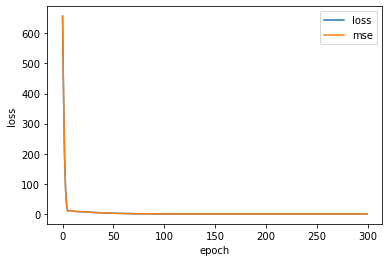

In [9]:
import matplotlib.pyplot as plt
# print(hist.history)
plt.plot(hist.history['loss'])
plt.plot(hist.history['mse'])
# #plt.ylim(0.0, 1.5)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'mse'], loc='upper right')
plt.show()

## 5. 평가 예측
* 예측값 데이터로 사용하기 위해 모양을 맞춰줘야 한다.(3차원!!)

In [10]:
loss, mse = model.evaluate(x, y, batch_size=1)
print("loss : ", loss)
print("mse : ", mse)

8/8 [==============================] - 0s 6ms/sample - loss: 3.1378e-11 - mse: 3.1378e-11
loss :  3.1377567211166024e-11
mse :  3.1377567e-11


In [11]:
x_predict = np.array([[9, 10, 11], [19, 20, 21]])
print(x_predict.shape) 
# x_predict = np.transpose(x_predict)
# print(x_predict.shape) 
x_predict = x_predict.reshape(1, x_predict.shape[0] * x_predict.shape[1])
print(x_predict.shape)

(2, 3)
(1, 6)


* mse :  3.1377567e-11 로 상당히 좋은 결과인 경우 
* 실제 31을 예상하고 예측값 :  [[23.658194]] 로 많이 차이의 오차가 있는 경우 

In [12]:
y_predict = model.predict(x_predict)
print("예측값 : ", y_predict)

예측값 :  [[23.658194]]
